# Telecom Customer Churn Prediction

In [1]:
#Importing the libraries
#for data manipulation and analysis
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
#notbook layout setting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Phase 1: Business Task
This project aims to analyze customer demographics, services, tenure and other variables, to predict whether a particular customer will churn or not.
### Data Dictionary:

| Variable         | Description                                                |
|------------------|------------------------------------------------------------|
| CustomerID       | Unique customer ID                                         |
| Gender           | Customer's gender                                          |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)     |
| Partner          | Whether the customer has a partner or not (Yes, No)        |
| Dependents       | Whether the customer has dependents or not (Yes, No)       |
| Tenure           | Number of months the customer has stayed with the company  |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)  |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract         | The contract term of the customer (Month-to-month, One year, Two years) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly |
| TotalCharges     | The total amount charged to the customer |
| Churn            | Whether the customer churned or not (Yes or No) |

## Phase 2: Understanding the dataset

In [2]:
#Loading the dataset
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data.shape

(7043, 21)

In [4]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
data.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Checking the unique values in each column
cols = data.columns
for i in cols:
    print(i, data[i].unique(), '\n')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank tran

* Overview of the dataset shows that there are 7043 rows and 21 columns.
* There are no missing values
* The data type for the TotalCharges column needs to be formatted correctly as float

## Phase 3: Data Preprocessing - 1

In [8]:
#convert data types
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
#checking for null values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Droping the null values
data.dropna(inplace=True)

In [11]:
#checking for duplicates
data.duplicated().sum()

np.int64(0)

In [12]:
#remove irrelevant features~customerID column
data.drop(columns='customerID', inplace=True)

In [13]:
#describe statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


The average tenure duration for customers are 29 months with an average monthly fee of 70.35$

SeniorCitizen
Skew : 1.83


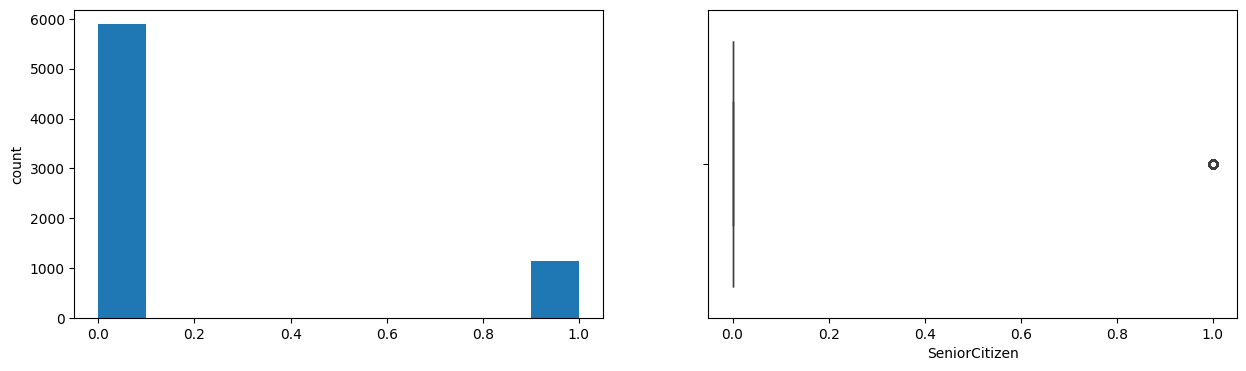

tenure
Skew : 0.24


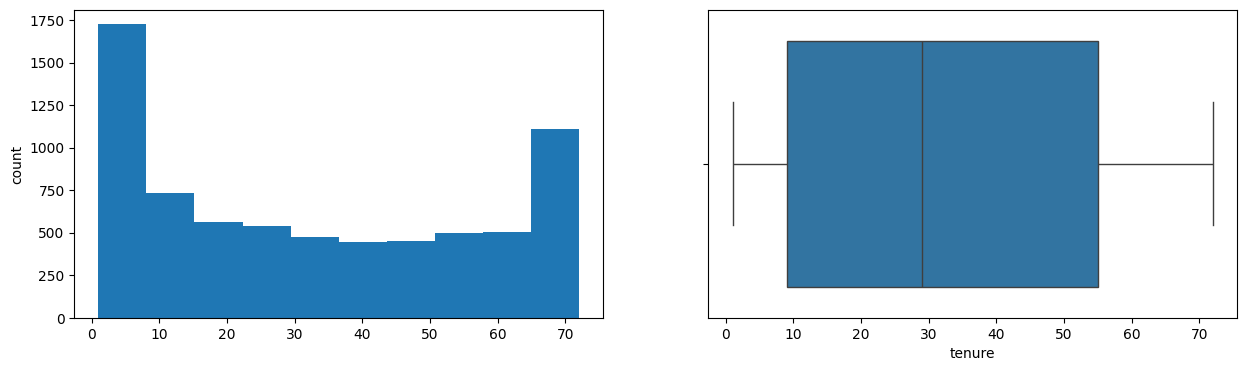

MonthlyCharges
Skew : -0.22


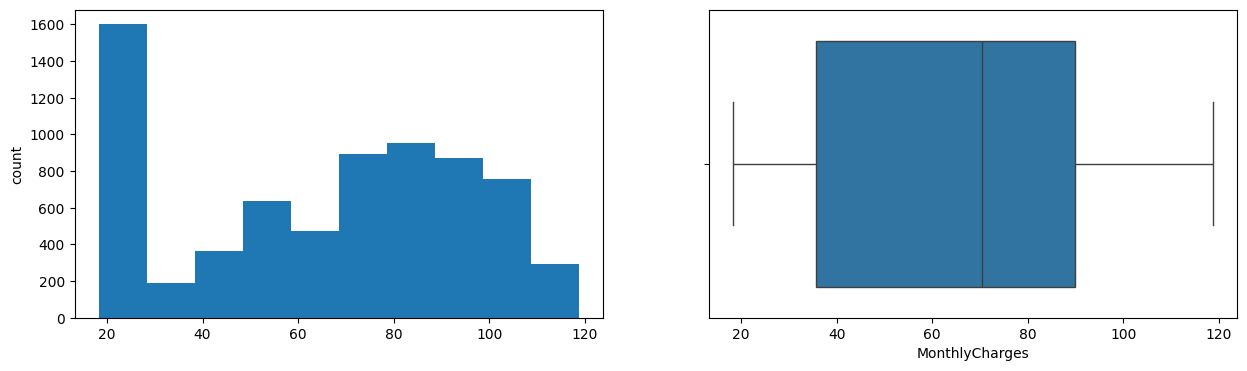

TotalCharges
Skew : 0.96


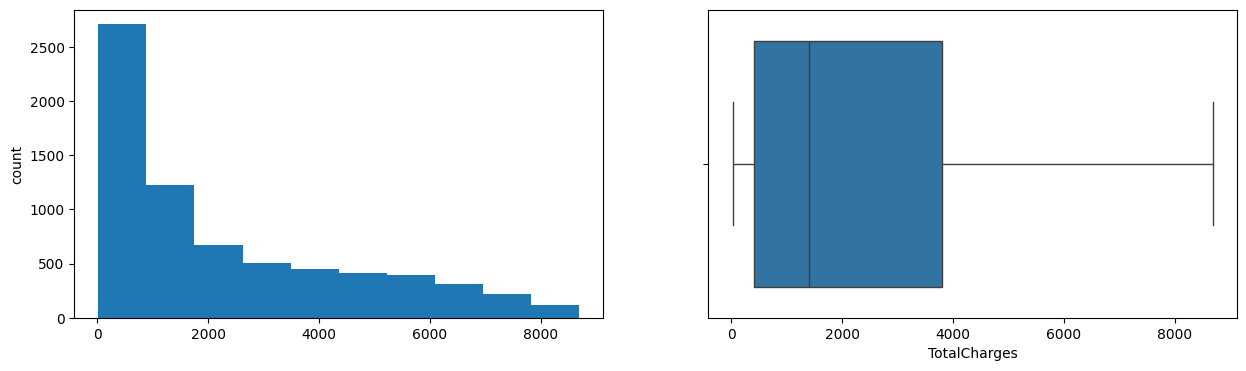

In [14]:
#checking for outliers
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show() 
#In the below fig, a histogram and box plot is used to show the pattern of the variables, as variables have shown skewness but no outliers.

## Phase 4: Exploratory Analysis
Here, I will be visualizing the data to get a better
understanding and to see if there are any trends or patterns in the data. 
* First I will begin with the distribution of the each variable in the dataset and then
* I will look at the relationship between the independent variables and the target variable.

#### Customer Demographics

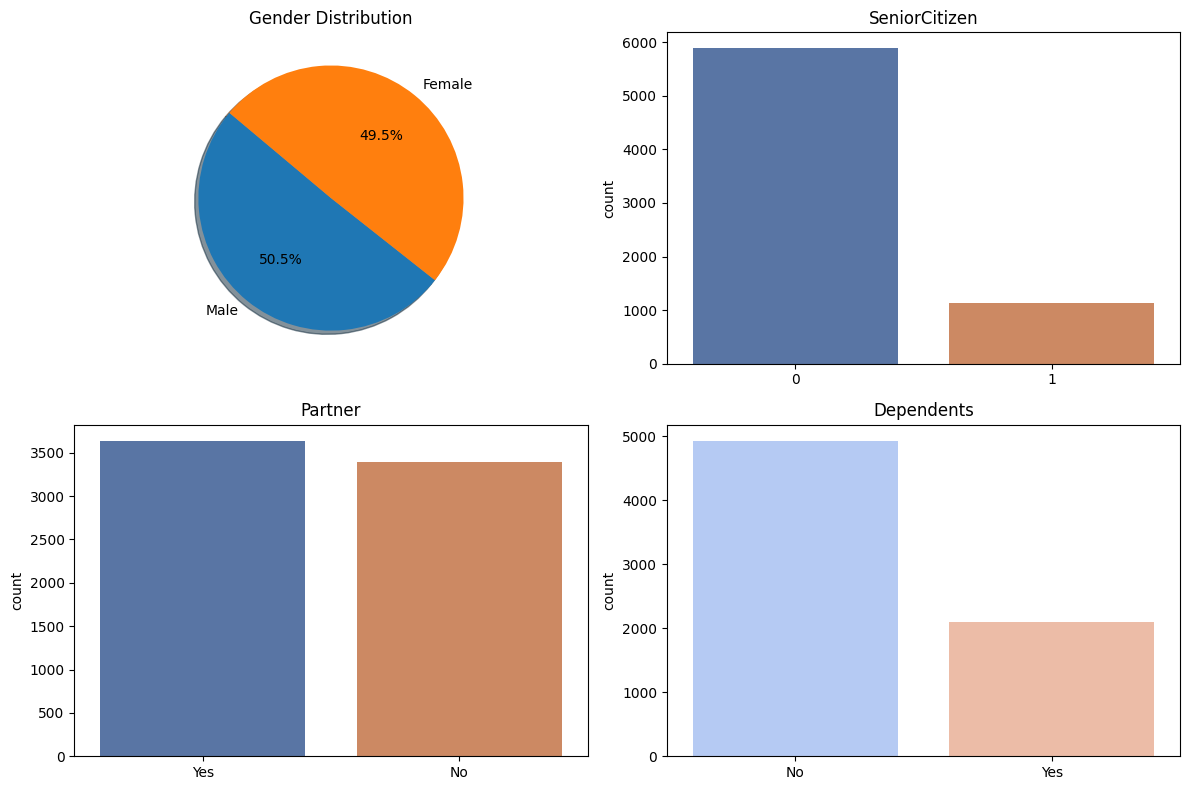

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
#Gender Distribution
ax[0,0].pie(data['gender'].value_counts(), labels = ['Male', 'Female'], autopct ='%1.1f%%', shadow=True, startangle=140)
ax[0,0].set_title('Gender Distribution')
#Senior Citizen Distribution
sns.barplot(y = data['SeniorCitizen'].value_counts(), x = data['SeniorCitizen'].unique(),palette="deep", ax=ax[0,1]).set_title('SeniorCitizen')
#Partner Distribution
sns.barplot(y = data['Partner'].value_counts(), x = data['Partner'].unique(),palette="deep", ax=ax[1,0]).set_title('Partner')
#Dependents Distribution
sns.barplot(y = data['Dependents'].value_counts(), x = data['Dependents'].unique(),palette="coolwarm", ax=ax[1,1]).set_title('Dependents')
# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


These graphs shows the customer demographics. The number of males and females is almost same, with few more males than females in the dataset. 
Majority of them are not senior citizen. Nearly 3500, customers have a partner and similar number of cutomersdon't. 
Majority of the customers don't have dependents, but still a significant number does have dependents.
From these graphs, we got to know about the customers demographics, which helped us to get an idea of their profile based on their age, relationship status, and dependents

#### Tenure and Contract

Text(0.5, 1.0, 'Contract Type')

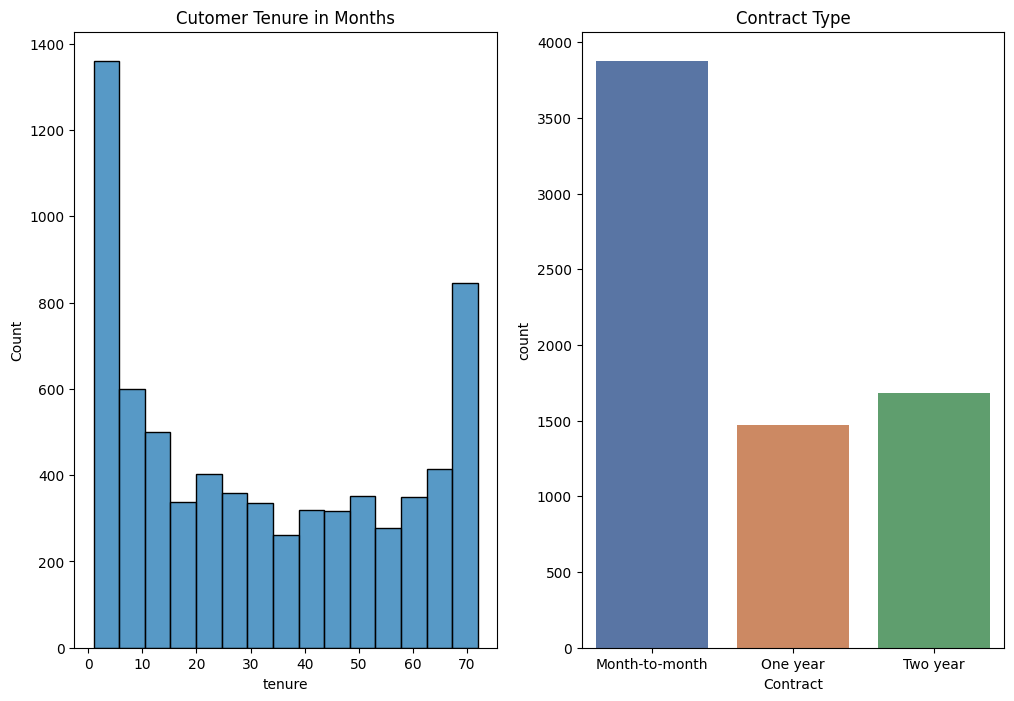

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.histplot(x = 'tenure', data = data, ax= ax[0]).set_title('Cutomer Tenure in Months')
sns.countplot(x = 'Contract', data = data, palette="deep", ax= ax[1]).set_title('Contract Type')

from graphs above, we can see the distribution of customer tenure with the comapny and the count of the type of contract the company had with the customers. Here, most of the customers had tenure less than a month, and most of the customers had a month-to-month contract type with the company. Therefore, the customers with shorter tenure have month-to-month contract with the company. In addtion to that, a significant number of
customers have tenure of approximately 70 months, which highlights the loyalty of the customers toward the company. Moreover, after month-to-month contract, the second most popular contract is two-year contract, which is opted by about 1700 customers.
Rest of the customers have tenure between 1-5 years.

#### Services

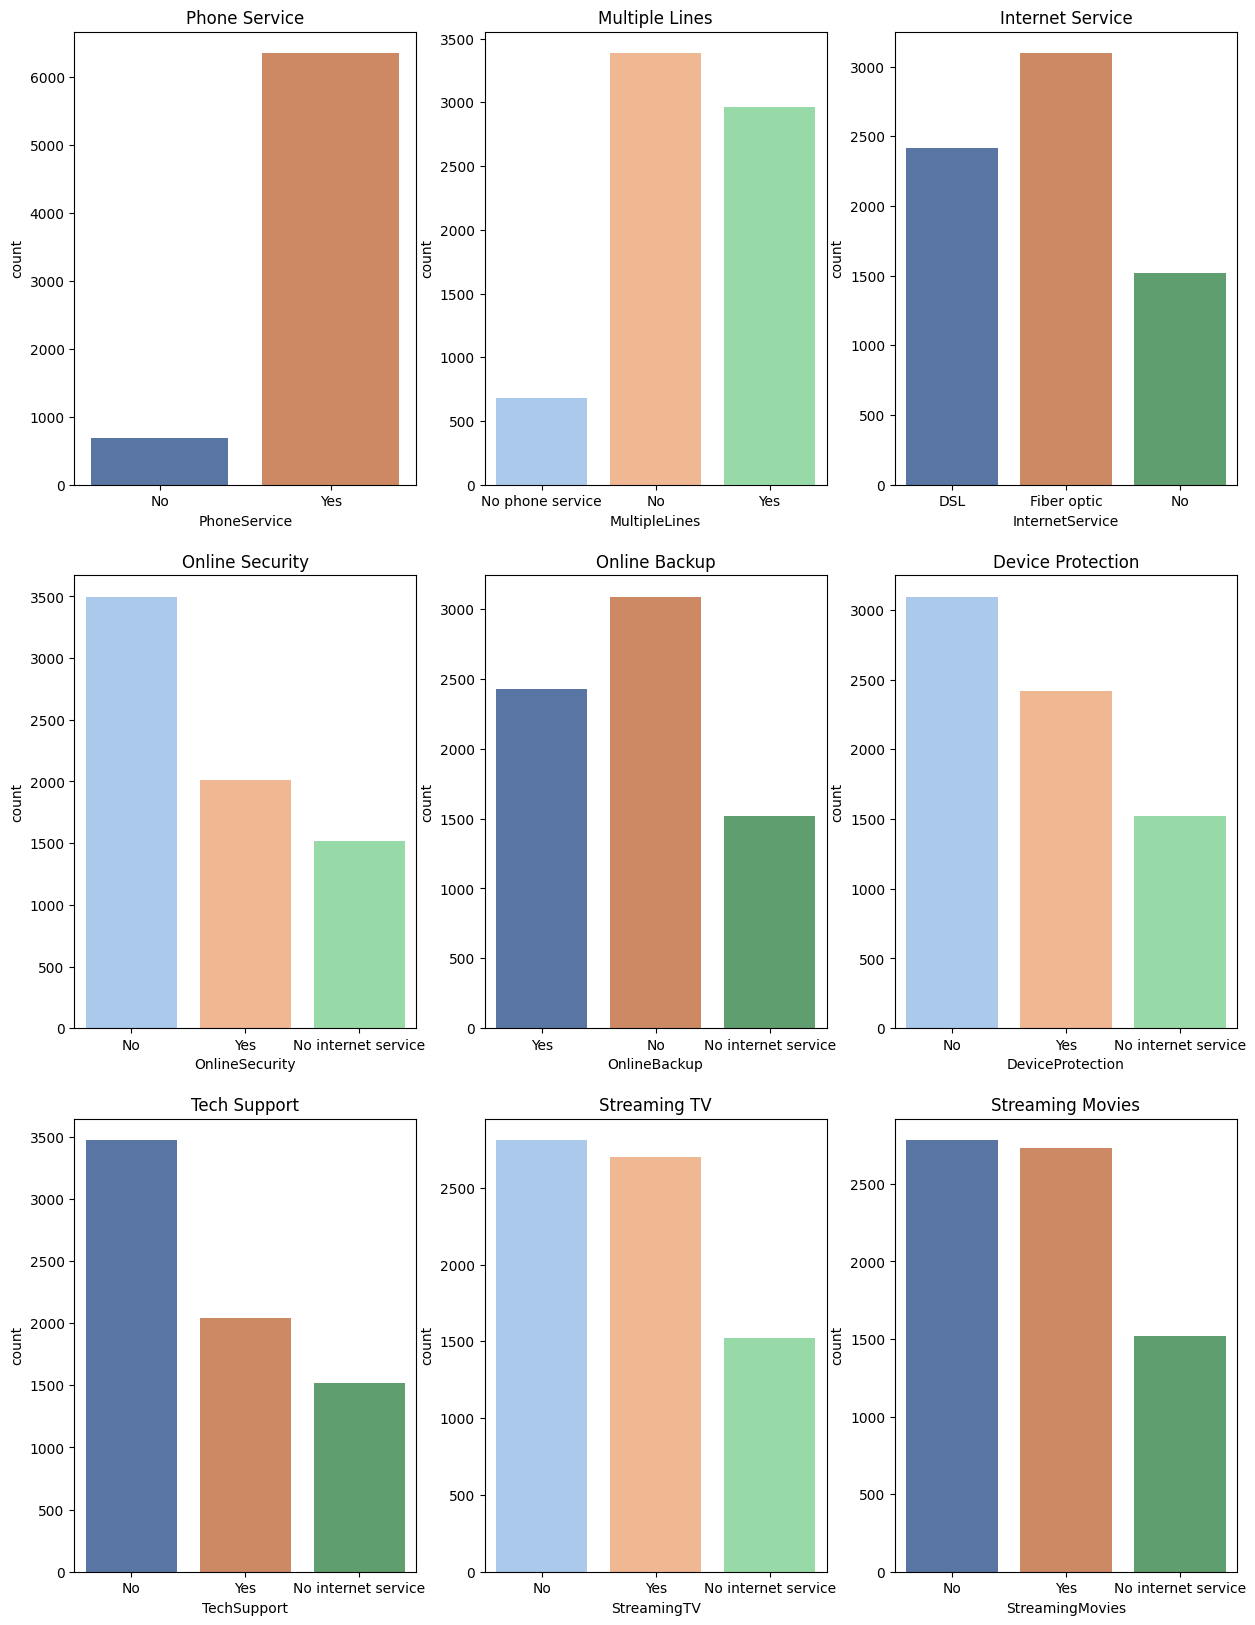

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(15, 20))
#phone service
sns.countplot(x = data['PhoneService'],palette="deep", ax=ax[0,0]).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines
sns.countplot(x = data['MultipleLines'],palette="pastel", ax=ax[0,1]).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service
sns.countplot(x = data['InternetService'],palette="deep", ax=ax[0,2]).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security
sns.countplot(x = data['OnlineSecurity'],palette="pastel", ax=ax[1,0]).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup
sns.countplot(x = data['OnlineBackup'],palette="deep", ax=ax[1,1]).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection
sns.countplot(x = data['DeviceProtection'],palette="pastel", ax=ax[1,2]).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support
sns.countplot(x = data['TechSupport'],palette="deep", ax=ax[2,0]).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV
sns.countplot(x = data['StreamingTV'],palette="pastel", ax=ax[2,1]).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = data['StreamingMovies'],palette="deep", ax=ax[2,2]).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')
palette="deep"

The above graphs visualizes the services taken by the customers from the telecom company. Nearly 6000 customers have taken phone service. However, about half of the cutomers have taken multiple lines from the company. Almost 5500, have taken internet services from the company, where 3000 customers opted for fibre optcs and they rest of them opted DSL which could be possible for business purposes. From these three major services related to telecom, the phone services and the internet services are the most popular services among the customers.

Coming to other services which include-
* Online Security,
* Online Backup,
* Device Protection,
* Tech Support, and Streaming Services.<br>

The online backup and device protection service is opted by almost 2500 customers, which higlights the customers concern regarding their device safety and data protection.
The online security and tech support is opted by almost 2000 customers which are least opted services among the customers.
The streaming services are the most popular services, with more than 2500 customers opting for it.
From this, I conclude that apart from the internet and phone services, the streaming services are most opted ones. Therefore, the company should focus on providing better streaming services to their customers.

#### Billing and Charges

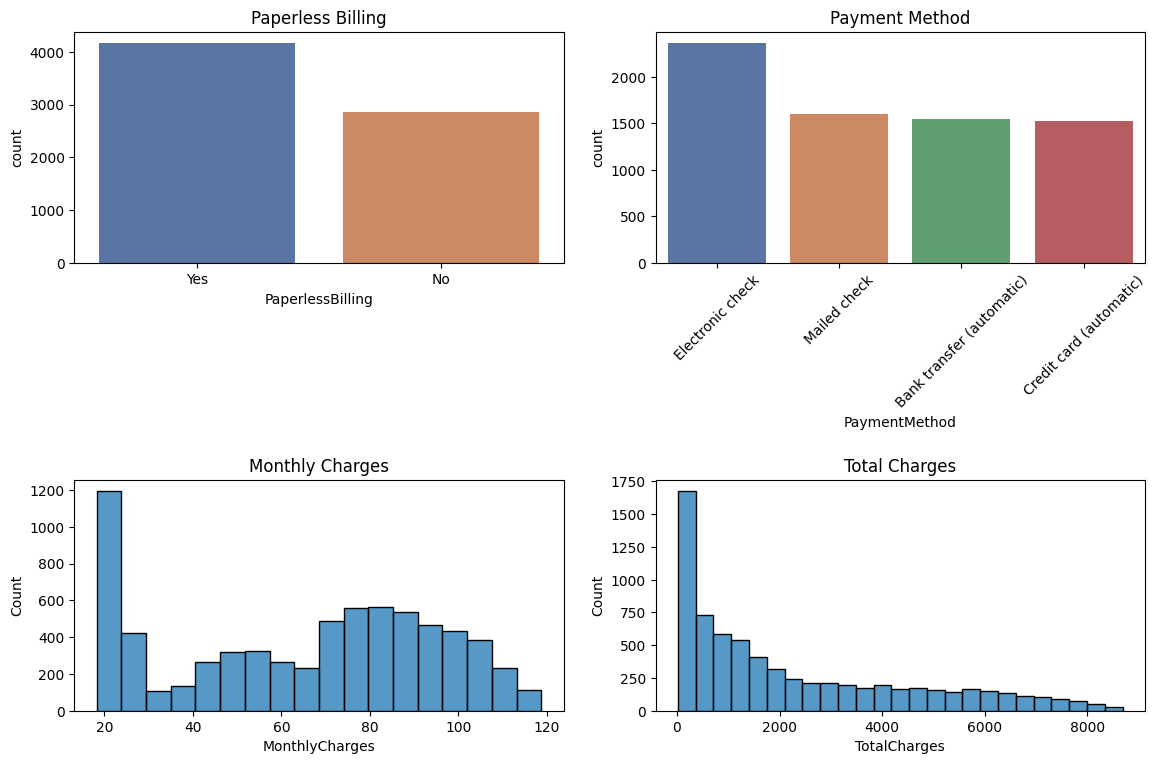

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
#papaerless billing
sns.countplot(x = data['PaperlessBilling'],palette="deep", ax=ax[0,0]).set_title('Paperless Billing')
#Payment Method
sns.countplot(x = data['PaymentMethod'],palette="deep", ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=45)
#Monthly Charges
sns.histplot(x = 'MonthlyCharges', data = data, ax = ax[1,0]).set_title('Monthly Charges')
#Total Charges
sns.histplot(x = 'TotalCharges', data = data, ax = ax[1,1]).set_title('Total Charges')
#spacing between subplots
fig.subplots_adjust(hspace=0.9)
fig.tight_layout(pad=2)

These graphs shows the method of billing and the billed amounts. About 4000 of customers prefer paperless billing, however, a little bit over half of them pay through electronic check. But still a good number of customers prefer paper bills. Apart from electronic checks, the other modes of payment accepted by the company includes -mailed checks, bank transfer and credit cards. Aproximately 4500 customers combined, prefer these modes of payment.
Now, for the monthly charges, About 18% of the customers pays around 20 dollars for the monthly services and majority of the customer have total charges less than 2000 dollars.

Additionally, there are considerable number of customers having monthly charges between 70 to 100 dollars and total charges between 2000 - 8000 dollars. Interestingly, looking at the total charges graph, we can see that some customers have a total bill of more than 8000. This could be possible if the customer has a long tenure or uses alot of services.
Overall, the company mainly have customers with low charges, which means the company should focus on these customers by providing even more affordable services.

#### Churn Count

Text(0.5, 1.0, 'Churn Count')

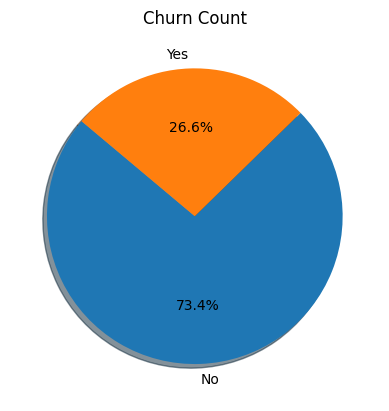

In [19]:
plt.pie(x = data['Churn'].value_counts(), labels = data['Churn'].unique(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Churn Count')

In the dataset, the number of churning customers is much less as compared to non-churning. Only 26.5% churned from the telecom company. This could be an evidence, that company is quite good at retaning its customers.

**Now, I will look at the relationship between the independent variables and the target variable.**

#### Customer Demogrpahics and Churn

Text(0.5, 1.0, 'Dependent and Churn')

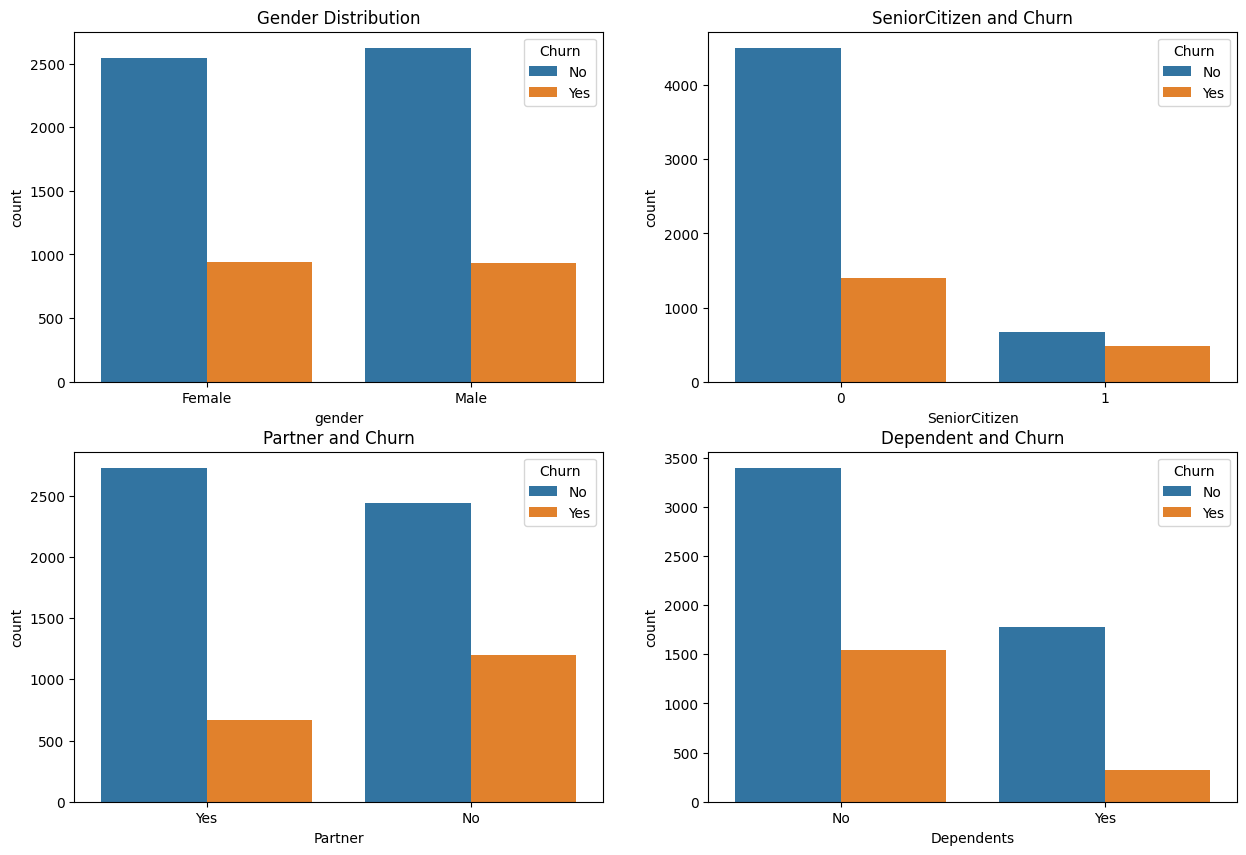

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#Gender Distribution
sns.countplot(x = 'gender', data = data, hue = 'Churn', ax=ax[0,0]).set_title('Gender Distribution')
#Senior Citizen Distribution
sns.countplot(x = data['SeniorCitizen'], ax=ax[0,1], hue = data['Churn']).set_title('SeniorCitizen and Churn')
#Partner Distribution
sns.countplot( x = data['Partner'], ax=ax[1,0], hue = data['Churn']).set_title('Partner and Churn')
#Dependents Distribution
sns.countplot(x = data['Dependents'], ax=ax[1,1], hue = data['Churn']).set_title('Dependent and Churn')

From these graphs, we can get to understand the relationship between customer demographics and customer churn. Both males and females have equal number of churn count, so there is no relationship between gender and customer churn. Secondly, senior citizens have a lesser churn count as compared to non-senior citizens, which may be because of their age and they don't want to hassle with the process of changing the telecom company. Also, the customers with no partners have higher churn count as compared to customers with partners. Similarly, customers with no dependents have higher churn
count as compared to customers with dependents.

From this, I conclude that customers who are single with no partner or have no dependents have higher churn count and senior citizens have lower churn count.

#### Tenure/Contract and Churn

Text(0.5, 1.0, 'Contract vs Churn')

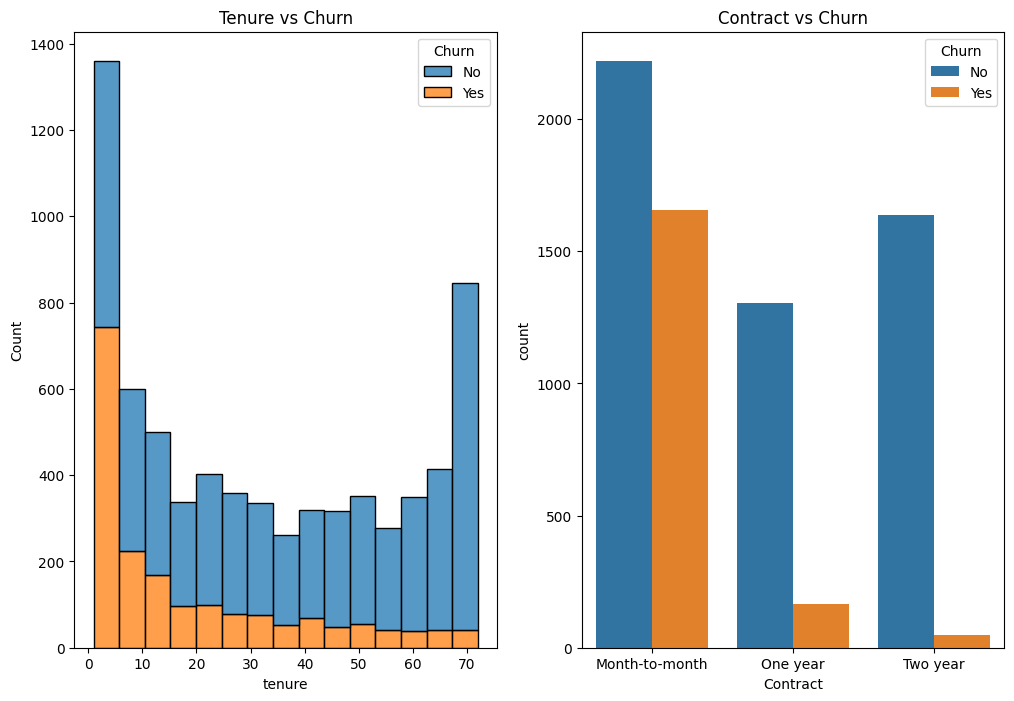

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.histplot(x = 'tenure', data = data, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Tenure vs Churn')
sns.countplot(x = 'Contract', data = data, ax= ax[1], hue = 'Churn').set_title('Contract vs Churn')

Interestingly, tenure and contract has an inverse relationship with customer churn. The customers with shorter tenure or tenure less than 5 months have a higher churn count. The churn count decreases with an increase in tenure. Furthermore, the customers with month-to-month contract have higher churn count as compared to those with one or two-years contract which also proves that customers who have longer contracts with the company have lower churn count.

#### Services and Churn

Text(0.5, 1.0, 'StreamingMovies vs Churn')

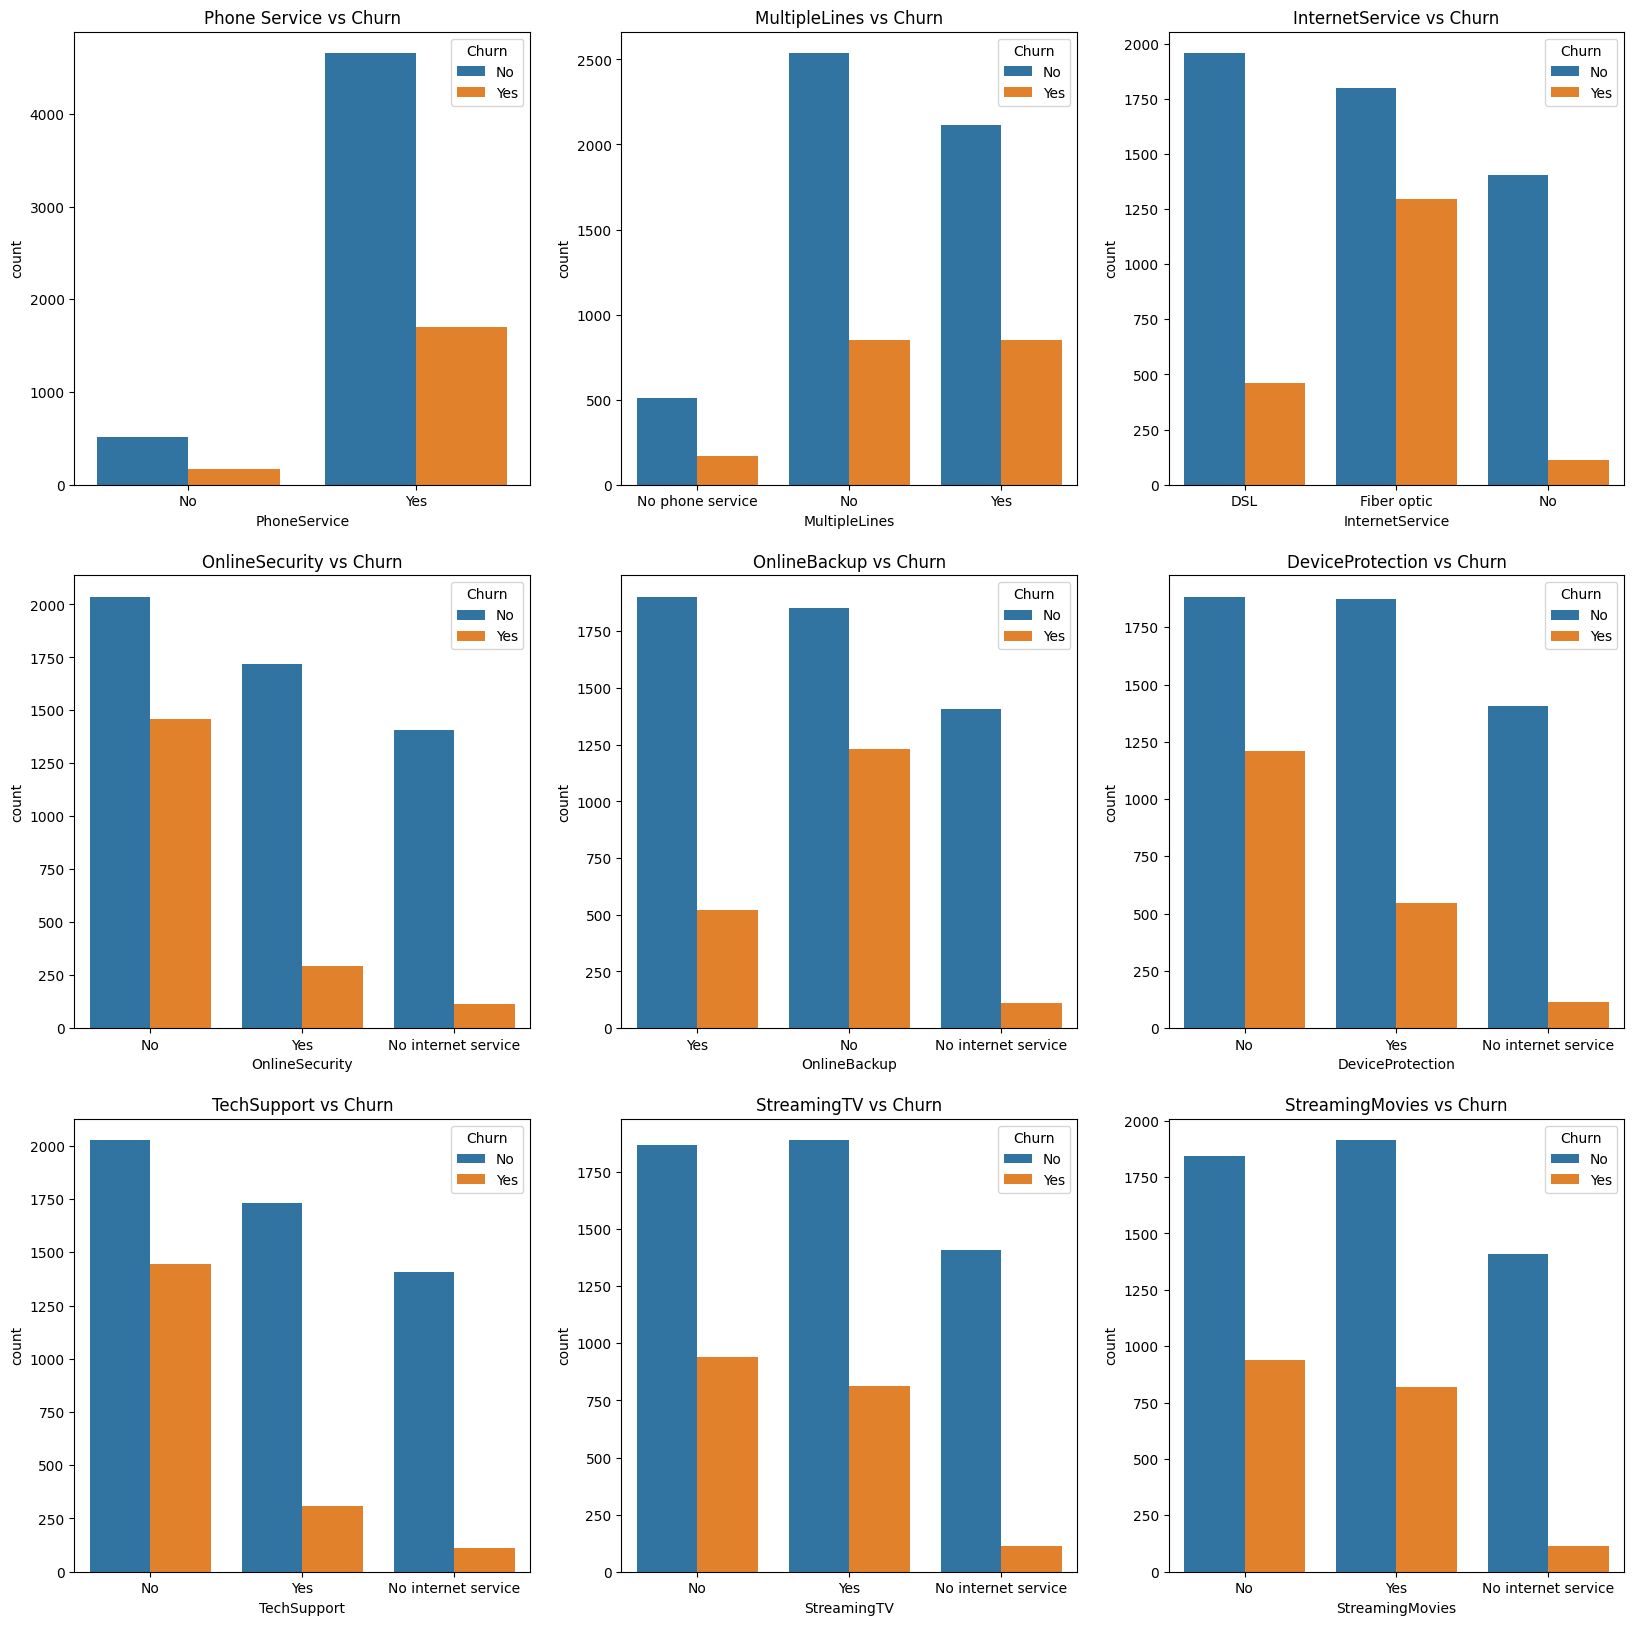

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = data['PhoneService'], ax=ax[0,0], hue = data['Churn']).set_title('Phone Service vs Churn')

#Multiple Lines                                                                        
sns.countplot(x = data['MultipleLines'], ax=ax[0,1], hue = data['Churn']).set_title('MultipleLines vs Churn')

#Internet Service
sns.countplot(x = data['InternetService'], ax=ax[0,2], hue = data['Churn']).set_title('InternetService vs Churn')

#Online Security
sns.countplot(x = data['OnlineSecurity'], ax=ax[1,0], hue = data['Churn']).set_title('OnlineSecurity vs Churn')

#Online Backup
sns.countplot(x = data['OnlineBackup'], ax=ax[1,1], hue = data['Churn']).set_title('OnlineBackup vs Churn')

#Device Protection
sns.countplot(x = data['DeviceProtection'], ax=ax[1,2], hue = data['Churn']).set_title('DeviceProtection vs Churn')

#Tech Support
sns.countplot(x = data['TechSupport'], ax=ax[2,0], hue = data['Churn']).set_title('TechSupport vs Churn')

#Streaming TV
sns.countplot(x = data['StreamingTV'], ax=ax[2,1], hue = data['Churn']).set_title('StreamingTV vs Churn')

#Streaming Movies
sns.countplot(x = data['StreamingMovies'], ax=ax[2,2], hue = data['Churn']).set_title('StreamingMovies vs Churn')


These graphs visualizes the relationship between customer churn, based on services opted by the customer. 
In the phone, multiple line and internet service, there is a relationship between churn and service opted, the churn count is higher for the customers, who have taken multiple lines and fibre opt internet service. 
Coming to other services, where customers who have not taken Online backup, online security or Device Protection service has higher churn count, than those who have opted.
lastly, the customers with streaming services and Tech support have a lower churn count as compared to those who have not opted for it.
Therefore, certain services have relation with the customer churn, which are multiple lines, Online Backup and Security, Device Protection, and Streaming Services.

#### Billing/Charges and Churn

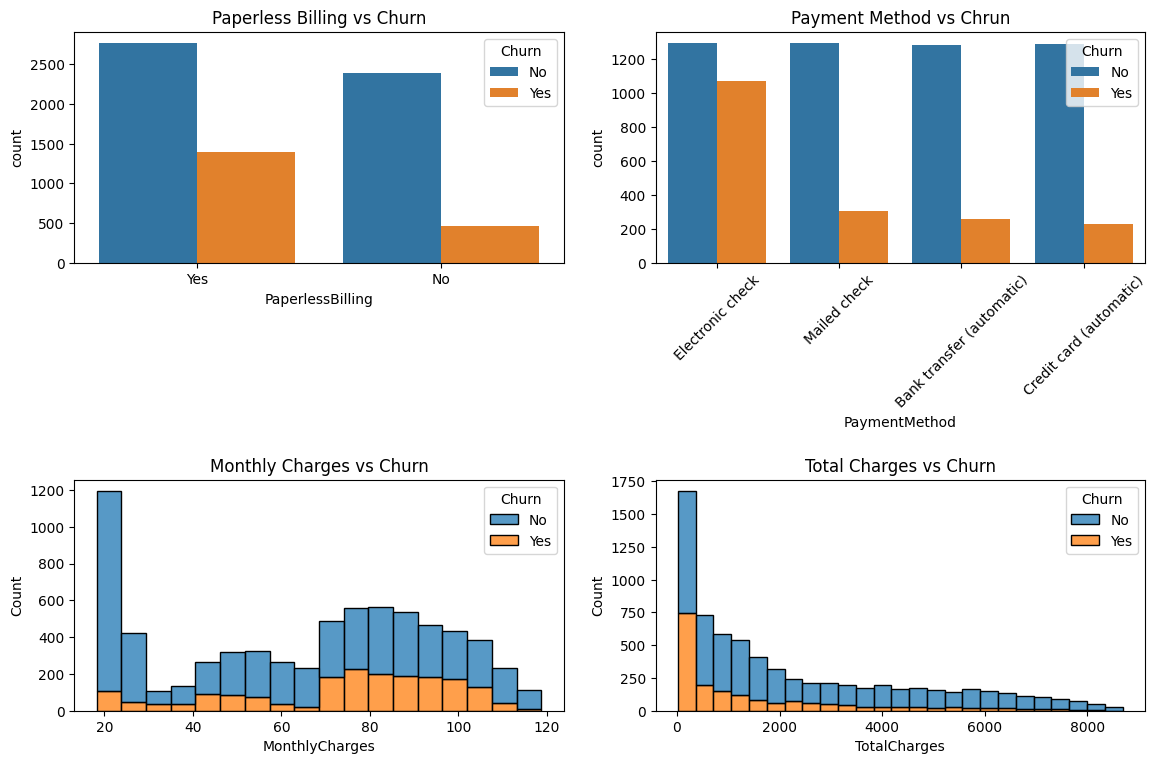

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
#papaerless billing
sns.countplot(x = 'PaperlessBilling', hue='Churn', data=data, ax=ax[0,0]).set_title('Paperless Billing vs Churn')
#Payment Method
sns.countplot(x = 'PaymentMethod', hue='Churn', data=data, ax=ax[0,1]).set_title('Payment Method vs Chrun')
ax[0,1].xaxis.set_tick_params(rotation=45)
#Monthly Charges
sns.histplot(x = 'MonthlyCharges', data = data, hue='Churn', multiple='stack', ax = ax[1,0]).set_title('Monthly Charges vs Churn')
#Total Charges
sns.histplot(x = 'TotalCharges', data = data, hue='Churn', multiple='stack', ax = ax[1,1]).set_title('Total Charges vs Churn')
#spacing between subplots
fig.subplots_adjust(hspace=0.9)
fig.tight_layout(pad=2)

The paperless billing and payment method have a relation with the customer churn given that there is higher churn count for customers who prefer paperless billing with majority of them being customers who opted for electronic check as payment method. 
The monthly charge has an interesting relationship with the customer churn. The customers with higher monthly charges have a higher churn
count, which is quite obvious. In contrast, the total charge has an inverse relationship with the customer churn as customers with higher total charges have lower churn count, which is quite interesting. This could be possible, if the customer has a long
tenure, contract or uses a lot of services. <br>
Overall, the company should focus on lowering the monthly charges for the customers to reduce the churn count.

## Phase 3: Data Preprocessing - ii

##### Encoding categorical variables into numerical

In [24]:
from sklearn.preprocessing import LabelEncoder
#colums for label encoding
cols = data.columns[data.dtypes == 'object']
#Label encoder object
le = LabelEncoder()
#Label encoding the columns
for i in cols:
    le.fit(data[i])
    data[i] = le.transform(data[i])
    print(i, data[i].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



##### Feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
#Standardizing the data
sc = StandardScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

<Axes: >

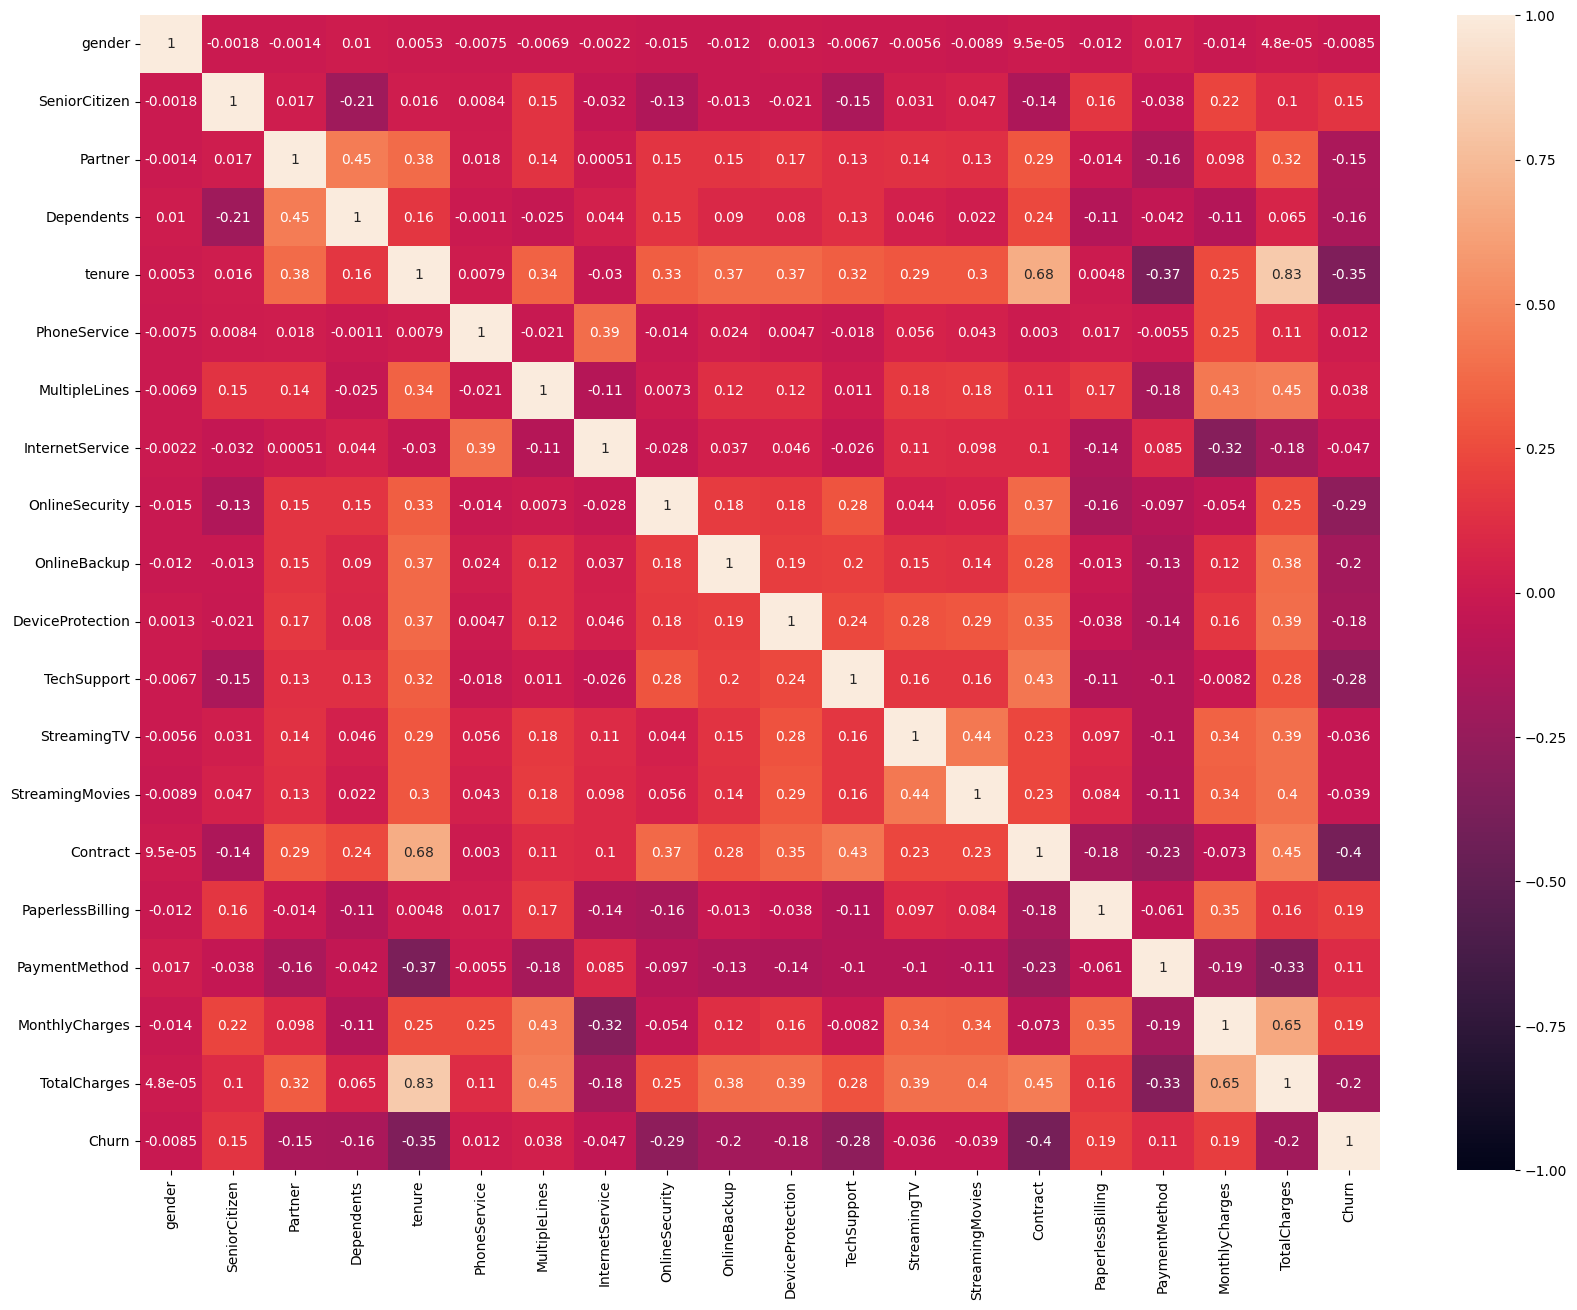

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot= True, vmin = -1, vmax = 1)

## Phase 5: Devloping a Model

I will be using the following models to predict the customer churn:
1. Logistic Regressor
2. Decision Tree Classifier
3. Random Forest Classifier
   

##### Let's start by splitting our data into a training set and test set 

##### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='Churn')
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

#### Training a Logistic Model

In [28]:
from sklearn.linear_model import LogisticRegression
#Logistic Regressor Object
logreg = LogisticRegression()

##### Hyperparameter Tuning using GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
#parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga','lbfgs'],
    'max_iter': [100, 200, 500]
}
#Grid Search Object with Logistic Regressor
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 3, n_jobs=-1)
#Fitting the data
grid_search.fit(X_train, y_train)
#Best parameters
print(grid_search.best_params_)

{'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}


In [30]:
# Logistic Regressor Object with best parameters
logreg = LogisticRegression(C= 0.1, max_iter= 100, solver= 'liblinear')
#Fitting the data
logreg.fit(X_train, y_train)
#Training accuracy
print('Training Accuracy: ', logreg.score(X_train, y_train))
#Predicting the values
logreg_pred = logreg.predict(X_test)

Training Accuracy:  0.8027224705404307


#### Training a Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

##### Hyperparameter Tuning using GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV
#parameter grid
param_grid = {
'max_depth': [2,4,6,8,10],
'min_samples_leaf': [2,4,6,8,10],
'min_samples_split': [2,4,6,8,10],
'criterion': ['gini', 'entropy'],
'random_state': [0,42]
}
#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs=-1)
#Fitting the data
grid_search.fit(X_train, y_train)
#Best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}


In [33]:
#Decision Tree Classifier Object with best parameters
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8, min_samples_split= 2, random_state= 0)
#Fitting the data
dtree.fit(X_train, y_train)
#Training accuracy
print('Training Accuracy: ', dtree.score(X_train, y_train))
#Predicting the values
dtree_pred = dtree.predict(X_test)

Training Accuracy:  0.8043478260869565


#### Training a Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier Object
rfc = RandomForestClassifier()

##### Hyperparameter Tuning using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
#parameter grid
param_grid = {
'max_depth': [2,4,6,8,10],
'min_samples_leaf': [2,4,6,8,10],
'min_samples_split': [2,4,6,8,10],
'criterion': ['gini', 'entropy'],
'random_state': [0,42]
}
#Grid Search Object with Random Forest Classifier
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs=-1)
#Fitting the data
grid_search.fit(X_train, y_train)
#Best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 0}


In [36]:
#Random Forest Classifier Object with best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6, min_samples_split=2, random_state =0)
#Fitting the data
rfc.fit(X_train, y_train)
#Training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))
#Predicting the values
rfc_pred = rfc.predict(X_test)

Training Accuracy:  0.8470134091832588


## Phase 6: Model Evaluation

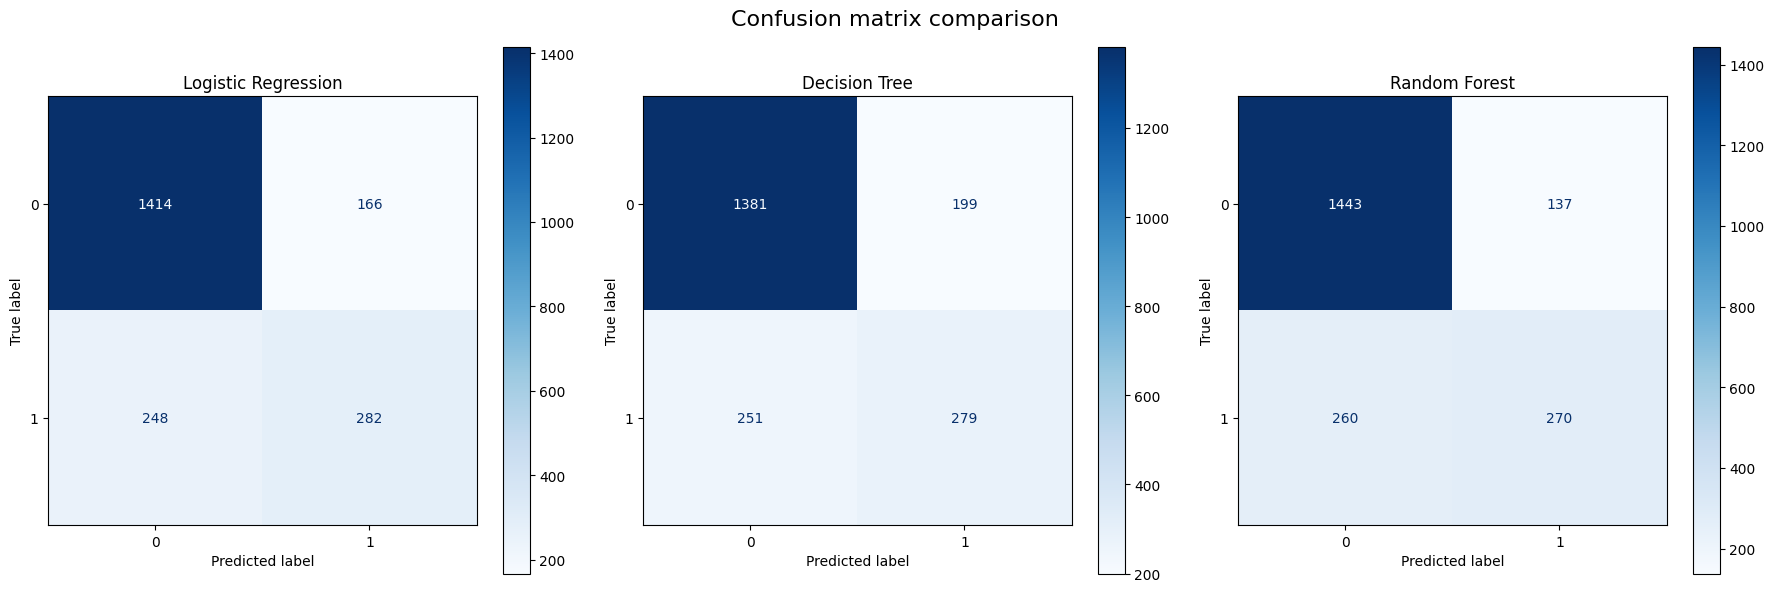

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Confusion matrix comparison', fontsize=16)
#for logistic regression
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
#for Decision tree classifier
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test, ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree')
#for Random forest classifier
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, ax=axes[2], cmap='Blues')
axes[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

The confusion matrix plot visualizes the true positive and true negative results from the machine learning models. We can see that the Random Forest Classifier has the highest true positive and true negative results, with fairly less false positive and false negative results. In conclusion, the Random Forest Classifier is the best model for predicting customer churn.

<Axes: title={'center': 'Random Forest'}, xlabel='Churn', ylabel='Density'>

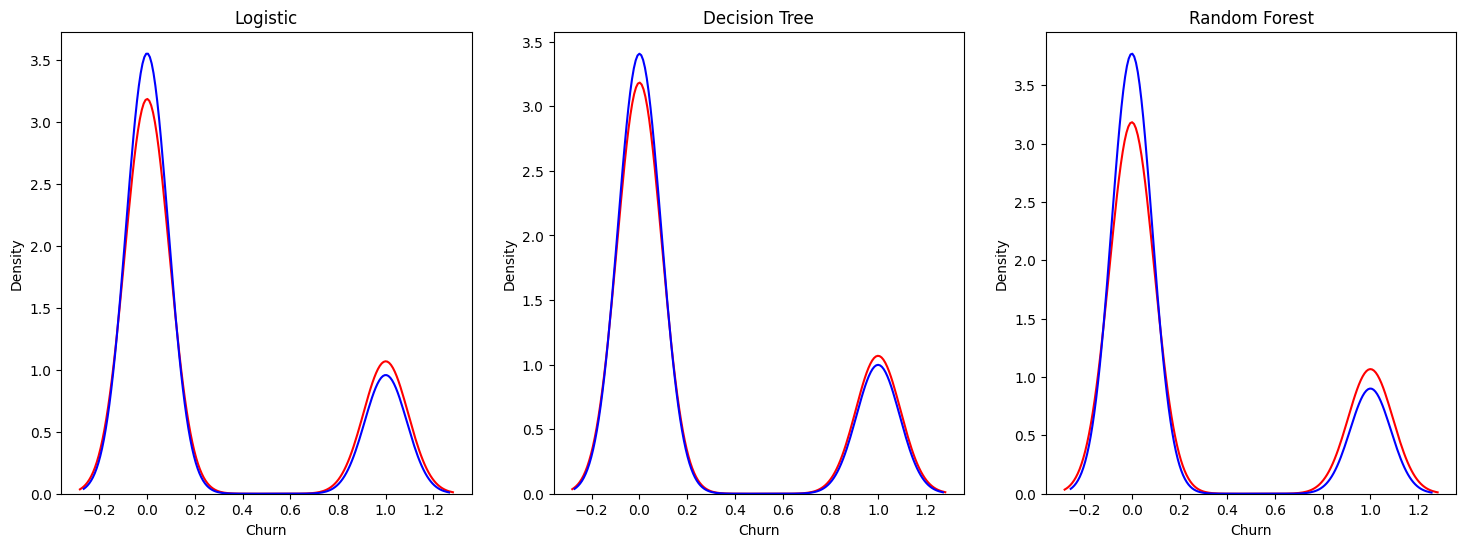

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
#logreg
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Logistic')
sns.distplot(logreg_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0])
#Decision Tree
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1]).set_title('Decision Tree')
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1])
#Random Forest
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[2]).set_title('Random Forest')
sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , ax=ax[2])


#### Classification report

In [39]:
from sklearn.metrics import classification_report
print('Logistic Classification Report: \n', classification_report(y_test, logreg_pred))
print('Decision Tree Classification Report: \n', classification_report(y_test, dtree_pred))
print('Random Forest Classification Report: \n', classification_report(y_test, rfc_pred))

Logistic Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.63      0.53      0.58       530

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.80      0.80      0.80      2110

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1580
           1       0.58      0.53      0.55       530

    accuracy                           0.79      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.66      0.51      0.58       530

    accuracy                           0.81      2110
   macro avg    

#### Model Metrics

Text(0.5, 1.0, 'Mean Squared Error')

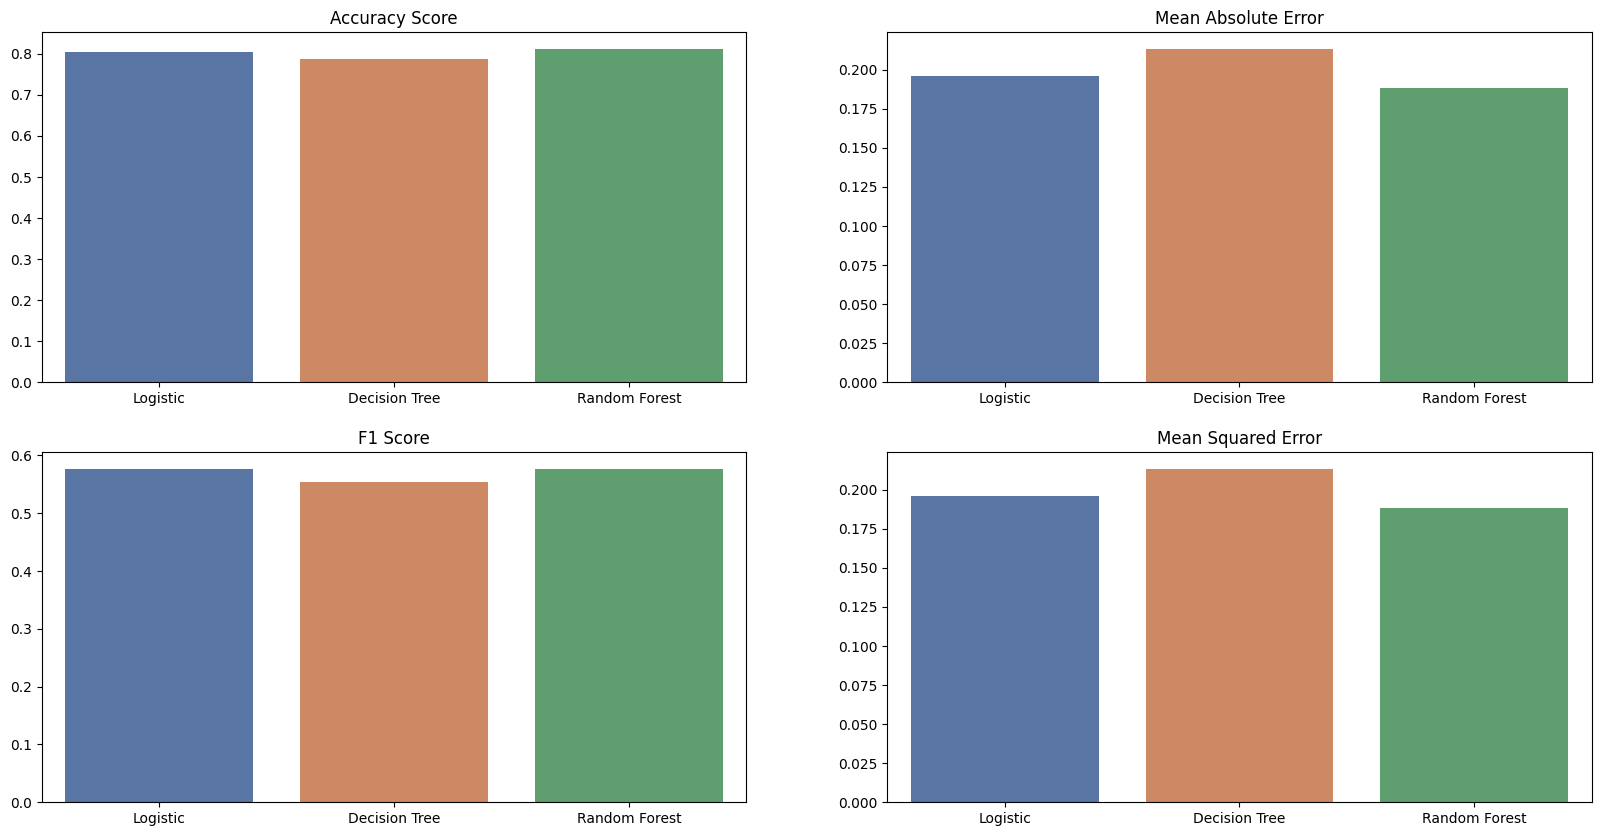

In [40]:
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, mean_squared_error
#Bar plots
fig, ax = plt.subplots(2,2, figsize=(20, 10))
#Accuracy Score
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest' ], palette='deep', y = [accuracy_score(y_test, logreg_pred),accuracy_score(y_test, dtree_pred),accuracy_score(y_test, rfc_pred)],ax=ax[0, 0])
ax[0, 0].set_title('Accuracy Score') 
#Mean Absolute Error
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest'],palette='deep', y = [mean_absolute_error(y_test, logreg_pred),mean_absolute_error(y_test, dtree_pred),mean_absolute_error(y_test, rfc_pred)],ax=ax[0, 1])
ax[0, 1].set_title('Mean Absolute Error')
#F1 Score
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest'],palette='deep', y = [f1_score(y_test, logreg_pred),f1_score(y_test, dtree_pred),f1_score(y_test, rfc_pred)],ax=ax[1, 0])
ax[1, 0].set_title('F1 Score')
#Mean Squared Error
sns.barplot(x = ['Logistic','Decision Tree', 'Random Forest'],palette='deep', y = [mean_squared_error(y_test, logreg_pred),mean_squared_error(y_test, dtree_pred),mean_squared_error(y_test, rfc_pred)],ax=ax[1, 1])
ax[1, 1].set_title('Mean Squared Error')

The Random Forest Classifier has the highest accuracy score and F1 Score. Additionally, it has the lowest mean squared error, and mean absolute
error. Overall, the Random Forest Classifier is a good fit for predicting the customer churn.

#### Feature Importance 

Text(0.5, 1.0, 'Random Forest Classifier feature Importance')

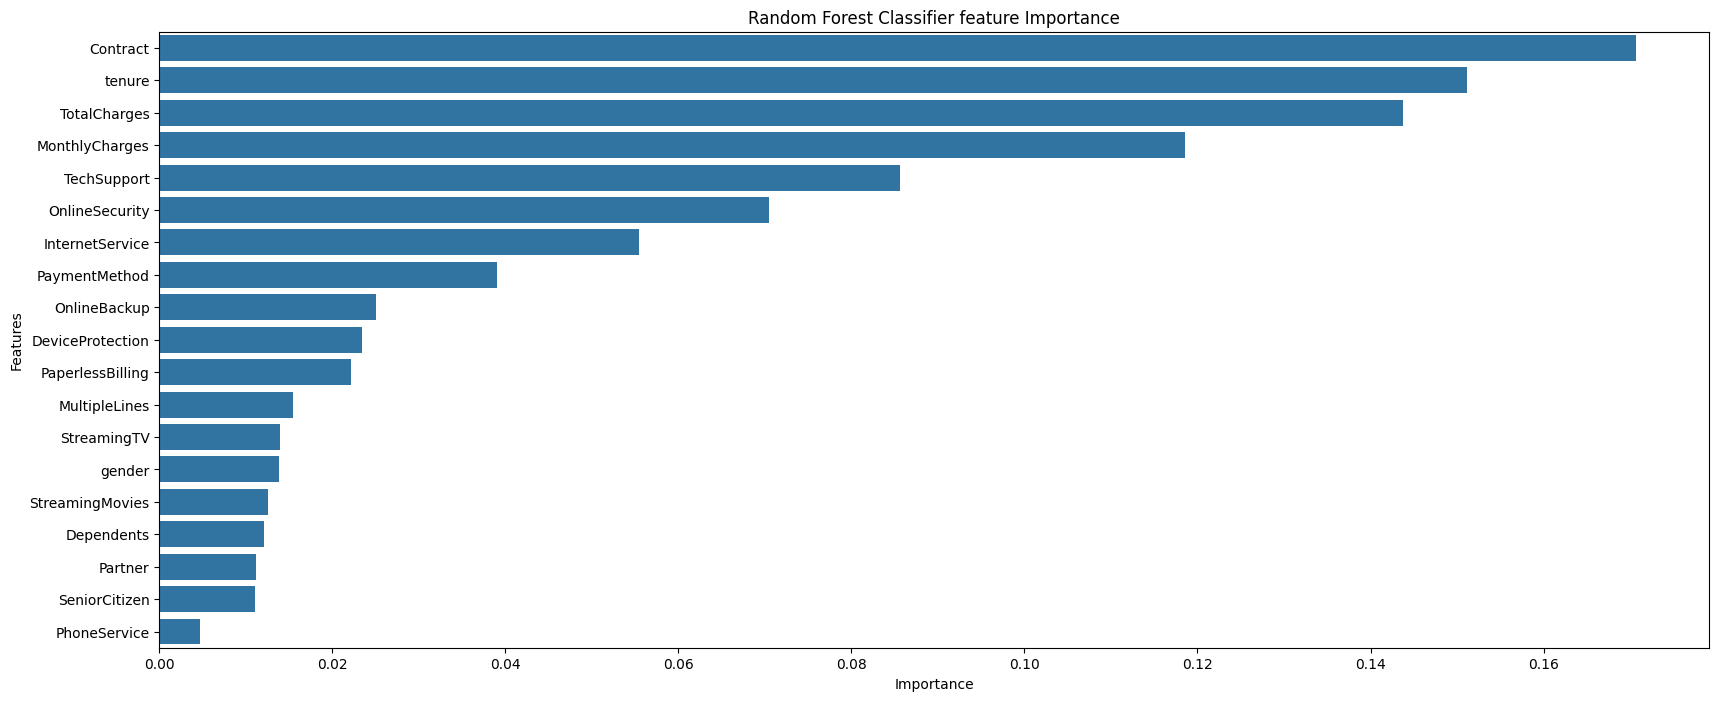

In [41]:
plt.figure(figsize=(20, 8))
# Random Forest Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df).set_title('Random Forest Classifier feature Importance')

The graph indicates that contract/tenure, monthly charges, and total charges are the most important features for predicting customer churn. Therefore, the company should focus on these features to reduce the customer churn

## Phase 7: Conclusion and Recommendation

From the exploratory data analysis, I discovered that the senior citizens have lower churn count whereas the customers who are single or don't have dependents have higher churn count. In addition to that, customers are more satisfied with streaming services than other services such as Online backup, Online security and Device protection, which has resulted in lower churn count in customers with these services than the other services.
The tenure/contract have an inverse relation with churn count, where customer with tenure shorter than 5 months have higher churn count. Also, the customers with month-to-month contract have higher churn counts compared to those with one or two years contract which also proves that customer who have longer contract with the company have lower churn counts.<br>
It has been observed that the customers with higher monthly charges and lower total charges have higher churn counts. Therefore, the company should focus on lowering the monthly charges for the customers to reduce the churn count. From the feature importance, it is clear that the contract, tenure, monthly charges, and total charges are the most important features for predicting customer churn.
Therefore, the company should focus on these features to reduce customer churn.<br>
Finally, for the machine learning models, I have used three models - Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. The Random Forest Classifier has the highest accuracy i.e. 80%, F1 Score, and the lowest mean squared error, and mean absolute error. <br>
Therefore, the Random Forest Classifier is a good fit for predicting customer churn and can be improved further by enriching it with more datasets and/or features.